In [36]:
# https://docs.opencv.org/3.4.0/d9/db0/tutorial_hough_lines.html
import sys
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def ShowImgs(images, titles, row, column, size):
    fig = plt.figure(figsize = size)
    for i in range(len(images)):
        fig.add_subplot(row, column, i+1), plt.imshow(images[i], cmap = 'gray'), plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()

In [37]:
# Loads an image
src = cv.imread('source.jpg', cv.IMREAD_GRAYSCALE)

In [38]:
# Detect the edges of the image by using a Canny detector
dst = cv.Canny(src, 50, 200, None, 3)
# Copy edges to the images that will display the results in RGB
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2RGB)
cdstP = np.copy(cdst)

In [39]:
# Standard Hough Line Transform
# args
#    dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
#    lines: A vector that will store the parameters (r,θ) of the detected lines
#    rho : The resolution of the parameter r in pixels. We use 1 pixel.
#    theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
#    threshold: The minimum number of intersections to "*detect*" a line
#    srn and stn: Default parameters to zero. Check OpenCV reference for more info.
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

# Draw detected lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (255,0,0), 3, cv.LINE_AA)

In [40]:
# Probabilistic Hough Line Transform
# args
#    dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
#    lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines
#    rho : The resolution of the parameter r in pixels. We use 1 pixel.
#    theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
#    threshold: The minimum number of intersections to "*detect*" a line
#    minLinLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
#    maxLineGap: The maximum gap between two points to be considered in the same line.
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

# Draw detected lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv.LINE_AA)

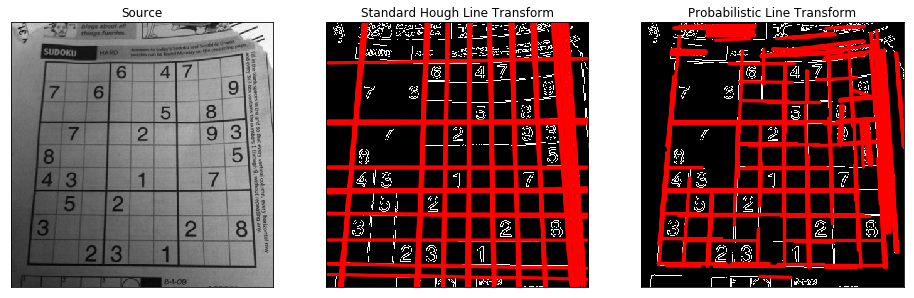

In [42]:
images = [src, cdst, cdstP]
titles = ["Source", "Standard Hough Line Transform", "Probabilistic Line Transform"]
ShowImgs(images, titles, 1, 3, (16, 16))